In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score,train_test_split,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV, ParameterGrid
import time as time

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
def mase(actual, forecast):
    n = len(actual)
    numerator = np.mean(np.abs(actual - forecast))
    denominator = np.mean(np.abs(np.diff(actual)))
    return numerator / denominator

In [3]:
covid_df = pd.read_csv('florida_multi_df.csv', parse_dates=['Date'])
covid_df.drop(columns = ['PROVINCE_STATE_NAME'], inplace = True)
covid_df = covid_df.rename(columns={'Date': 'ds', 'PEOPLE_POSITIVE_NEW_CASES_COUNT': 'y'})
covid_df.set_index('ds', inplace=True)

train_size = int(len(covid_df)* 0.85)
covid_train, covid_test = covid_df[0:train_size], covid_df[train_size:]

In [4]:
covid_train = covid_train[['y', 'new_cases_10_max', 'Booster_Doses_50Plus', 'new_cases_10_mean', 'minimum_temperature_celsius', 'new_cases_7_lag', 'new_cases_350_lag', 'new_cases_10_std', 'maximum_temperature_celsius', 'new_hospitalized_patients', 'Series_Complete_5Plus']]
covid_test = covid_test[['y', 'new_cases_10_max', 'Booster_Doses_50Plus', 'new_cases_10_mean', 'minimum_temperature_celsius', 'new_cases_7_lag', 'new_cases_350_lag', 'new_cases_10_std', 'maximum_temperature_celsius', 'new_hospitalized_patients', 'Series_Complete_5Plus']]

In [5]:
X_train = covid_train.drop(columns=['y'], axis=1)
y_train = covid_train['y']
X_test = covid_test.drop(columns=['y'], axis=1)
y_test = covid_test['y']

In [6]:
reg_model = xgb.XGBRegressor(learning_rate=0.01,n_estimators=10000, early_stopping_rounds=10)
reg_model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], 
       verbose=True)

[0]	validation_0-rmse:20118.07169	validation_1-rmse:64607.26389
[1]	validation_0-rmse:19964.37453	validation_1-rmse:64324.22121
[2]	validation_0-rmse:19812.23192	validation_1-rmse:64044.14381
[3]	validation_0-rmse:19661.57160	validation_1-rmse:63767.01501
[4]	validation_0-rmse:19512.41294	validation_1-rmse:63492.78099
[5]	validation_0-rmse:19364.76881	validation_1-rmse:63221.43569
[6]	validation_0-rmse:19218.55570	validation_1-rmse:62951.97029
[7]	validation_0-rmse:19073.81266	validation_1-rmse:62686.32949
[8]	validation_0-rmse:18930.50675	validation_1-rmse:62423.55889
[9]	validation_0-rmse:18788.67379	validation_1-rmse:62163.49311
[10]	validation_0-rmse:18648.21622	validation_1-rmse:61895.51530
[11]	validation_0-rmse:18509.12166	validation_1-rmse:61640.68981
[12]	validation_0-rmse:18371.37002	validation_1-rmse:61379.17114
[13]	validation_0-rmse:18234.96510	validation_1-rmse:61120.27647
[14]	validation_0-rmse:18099.87285	validation_1-rmse:60873.34662
[15]	validation_0-rmse:17966.06724	

[127]	validation_0-rmse:8507.72352	validation_1-rmse:40794.30388
[128]	validation_0-rmse:8456.10051	validation_1-rmse:40652.70156
[129]	validation_0-rmse:8406.25619	validation_1-rmse:40511.99151
[130]	validation_0-rmse:8356.47135	validation_1-rmse:40372.17803
[131]	validation_0-rmse:8305.95700	validation_1-rmse:40233.23683
[132]	validation_0-rmse:8257.29834	validation_1-rmse:40095.20019
[133]	validation_0-rmse:8208.61061	validation_1-rmse:39958.05779
[134]	validation_0-rmse:8160.67256	validation_1-rmse:39821.63133
[135]	validation_0-rmse:8112.65271	validation_1-rmse:39686.16632
[136]	validation_0-rmse:8065.42222	validation_1-rmse:39551.48141
[137]	validation_0-rmse:8018.10663	validation_1-rmse:39417.75221
[138]	validation_0-rmse:7971.14215	validation_1-rmse:39284.88491
[139]	validation_0-rmse:7924.94209	validation_1-rmse:39151.67294
[140]	validation_0-rmse:7878.64330	validation_1-rmse:39019.36326
[141]	validation_0-rmse:7833.09922	validation_1-rmse:38887.77777
[142]	validation_0-rmse:7

[254]	validation_0-rmse:4236.51331	validation_1-rmse:30281.02274
[255]	validation_0-rmse:4214.69131	validation_1-rmse:30298.41261


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

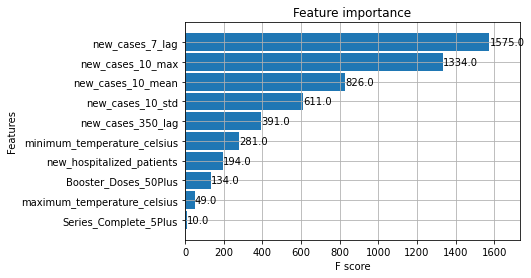

In [7]:
_ = plot_importance(reg_model, height=0.9 ,max_num_features = 10)

<AxesSubplot:xlabel='ds'>

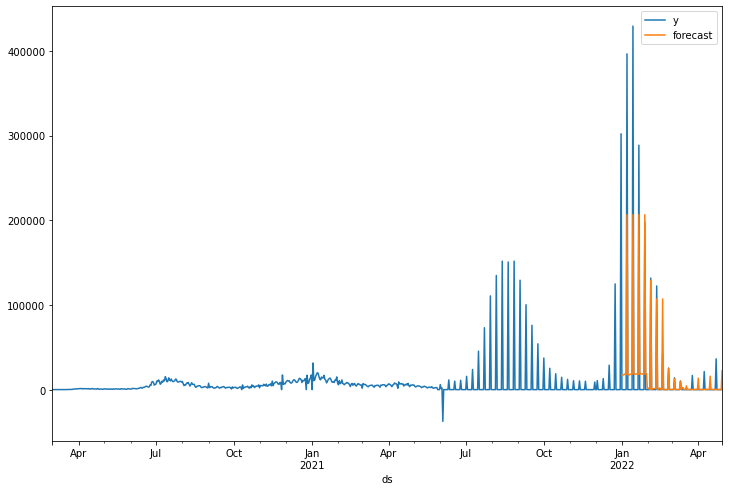

In [8]:
covid_test['forecast'] = reg_model.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast']=covid_test['forecast']

prophet_df_multi[['y', 'forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

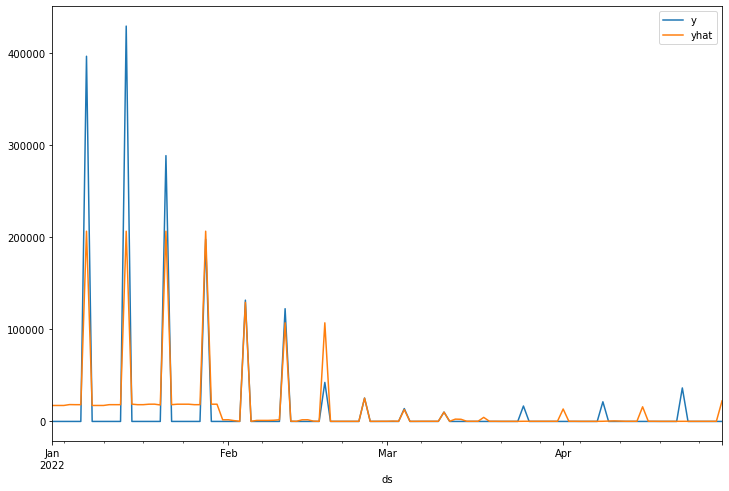

In [9]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [10]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  30203.00097657483
Test MAE:  10246.772354125977
MASE =  0.34889212065886077


In [11]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 5, test_size = 100, gap = 1)
covid_df = covid_df.sort_index()

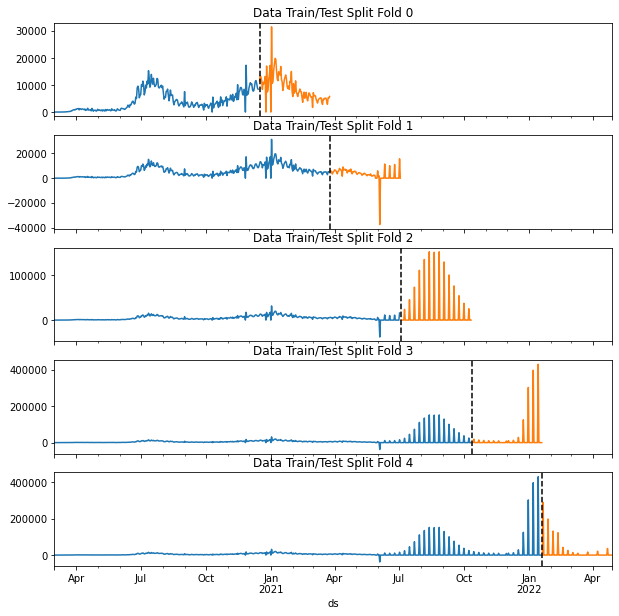

In [12]:
fig, axs = plt.subplots(5, 1, figsize=(10, 10), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(covid_df):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    train['y'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['y'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [13]:
tss = TimeSeriesSplit(n_splits=5, test_size=100, gap=1)
covid_df = covid_df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(covid_df):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    TARGET = 'y'

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=20,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)  

[22:25:21] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:20120.84021	validation_1-rmse:64607.28034
[100]	validation_0-rmse:10218.38121	validation_1-rmse:44970.48723
[200]	validation_0-rmse:6045.90307	validation_1-rmse:32429.71423
[266]	validation_0-rmse:4576.20090	validation_1-rmse:30392.59251
[22:25:21] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:20120.84021	validation_1-rmse:64607.28034
[100]	validation_0-rmse:10218.38121	validation_1-rmse:44970.48723
[200]	validation_0-rmse:6045.90307	validation_1-rmse:32429.71423
[265]	validation_0-rmse:4593.26369	validation_1-rmse:30361.89946
[22:25:21] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is 

<AxesSubplot:xlabel='ds'>

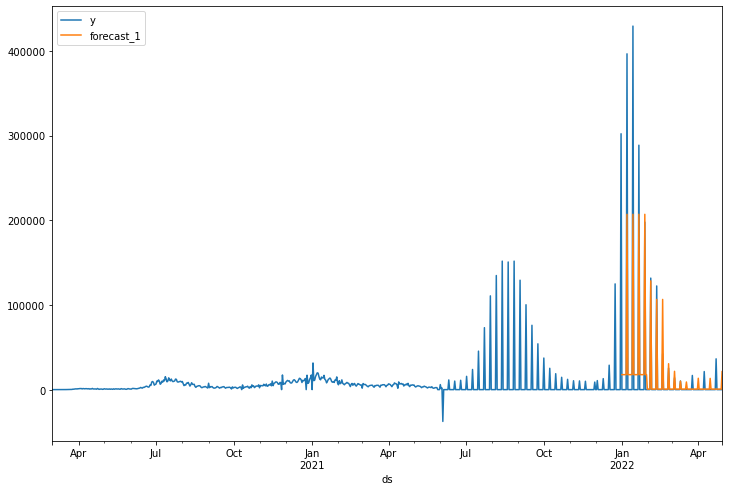

In [14]:
covid_test['forecast_1'] = reg.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast_1']=covid_test['forecast_1']

prophet_df_multi[['y', 'forecast_1']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

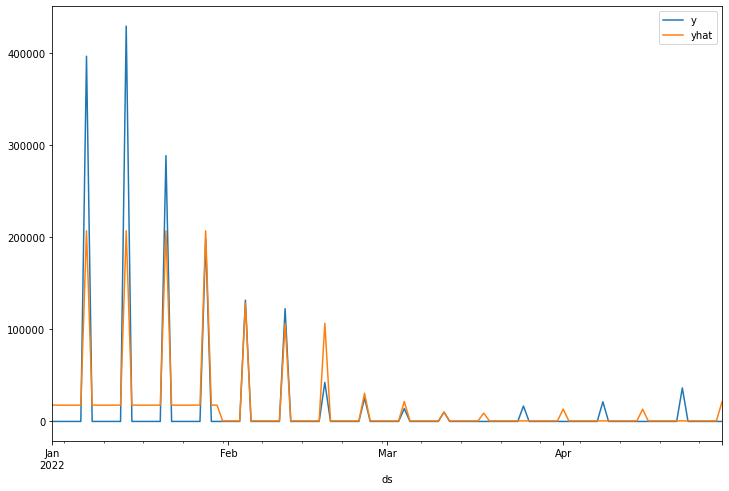

In [15]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast_1'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [16]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  30203.00097657483
Test MAE:  10246.772354125977
MASE =  0.34889212065886077
